# Time Series Analysis 

Significance of Time Series TSA is the backbone for prediction and forecasting analysis, specific to time-based problem statements.

Analyzing the historical dataset and its patterns Understanding and matching the current situation with patterns derived from the previous stage. Understanding the factor or factors influencing certain variable(s) in different periods.

# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Avarage

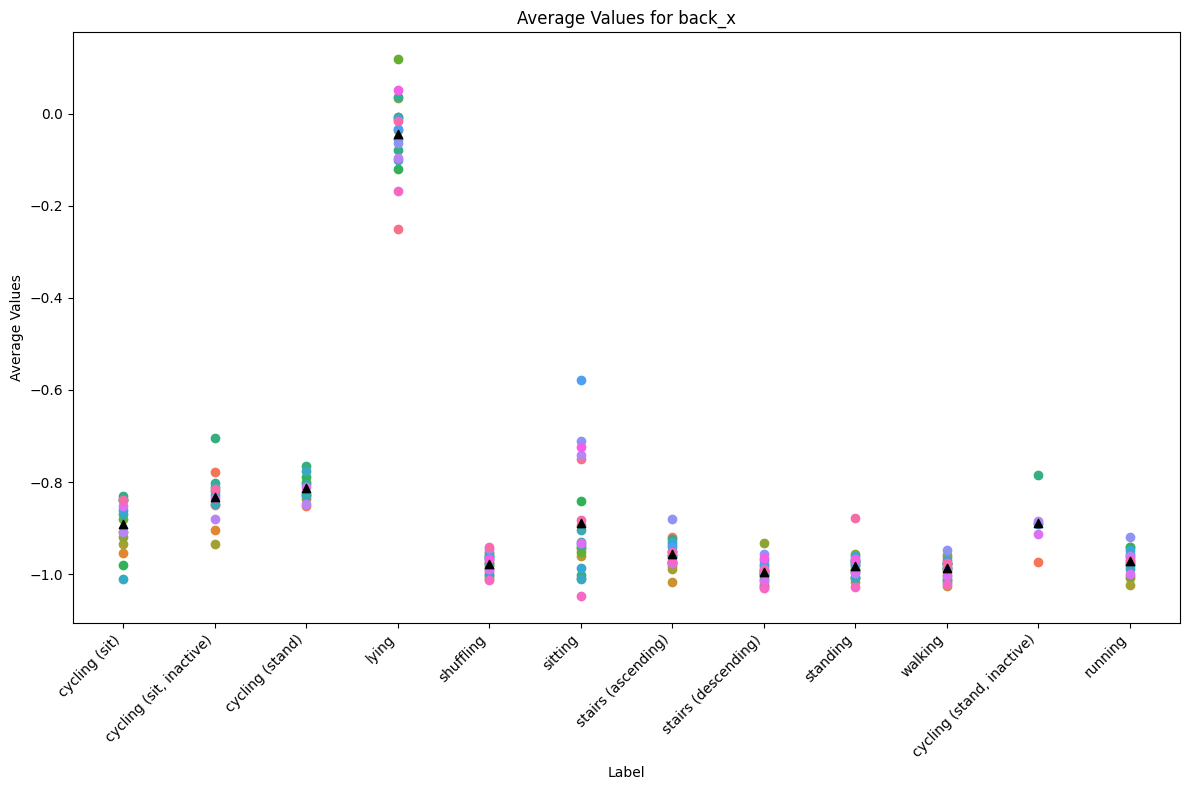

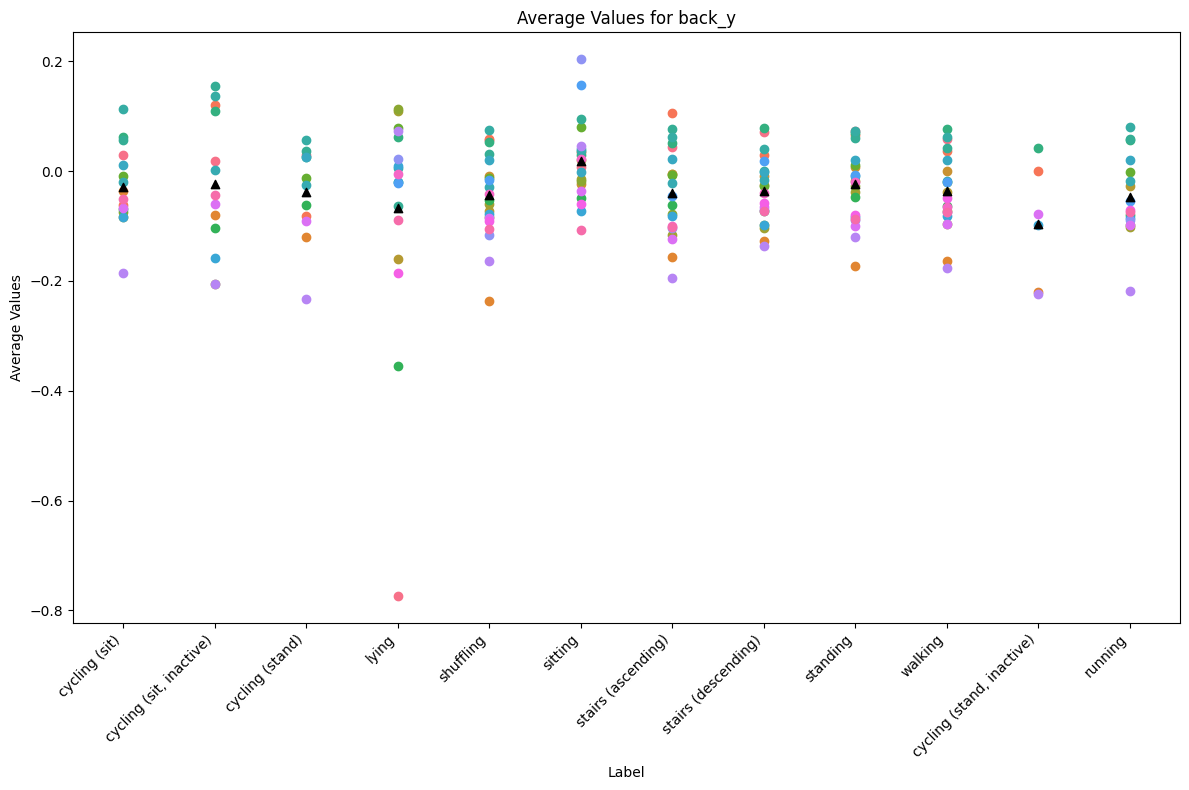

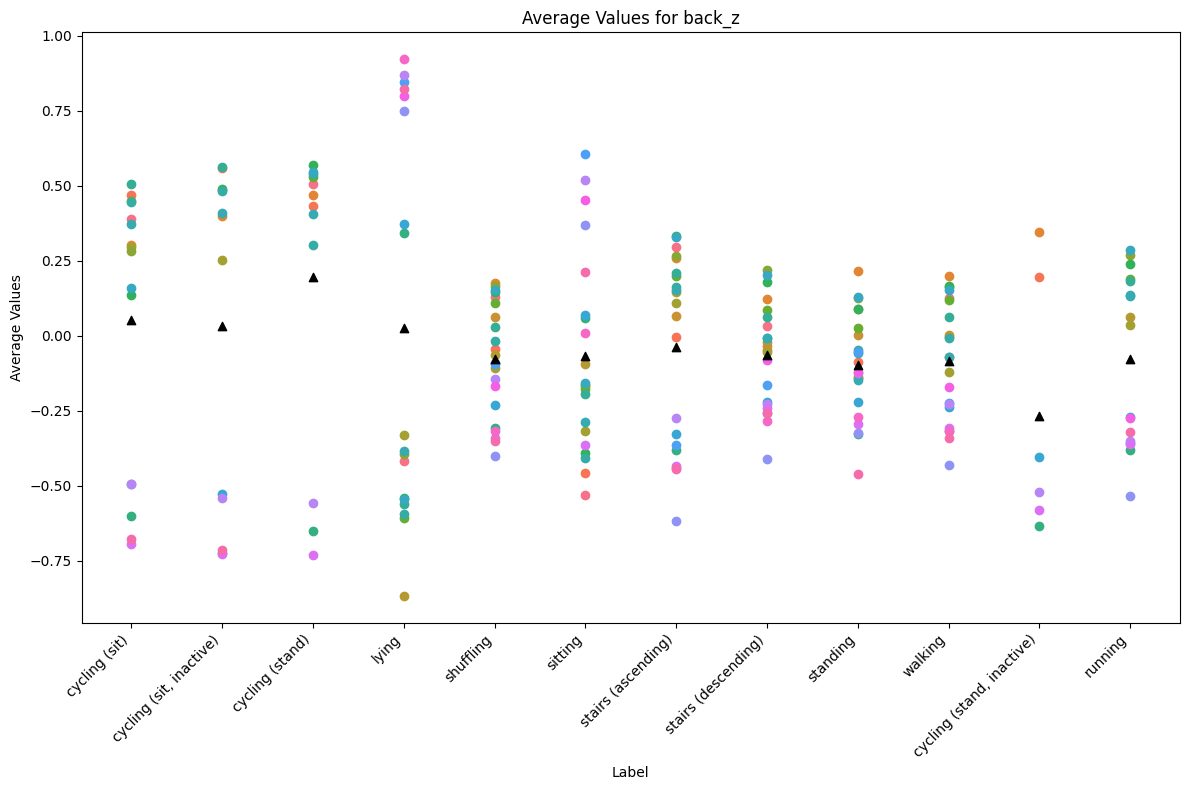

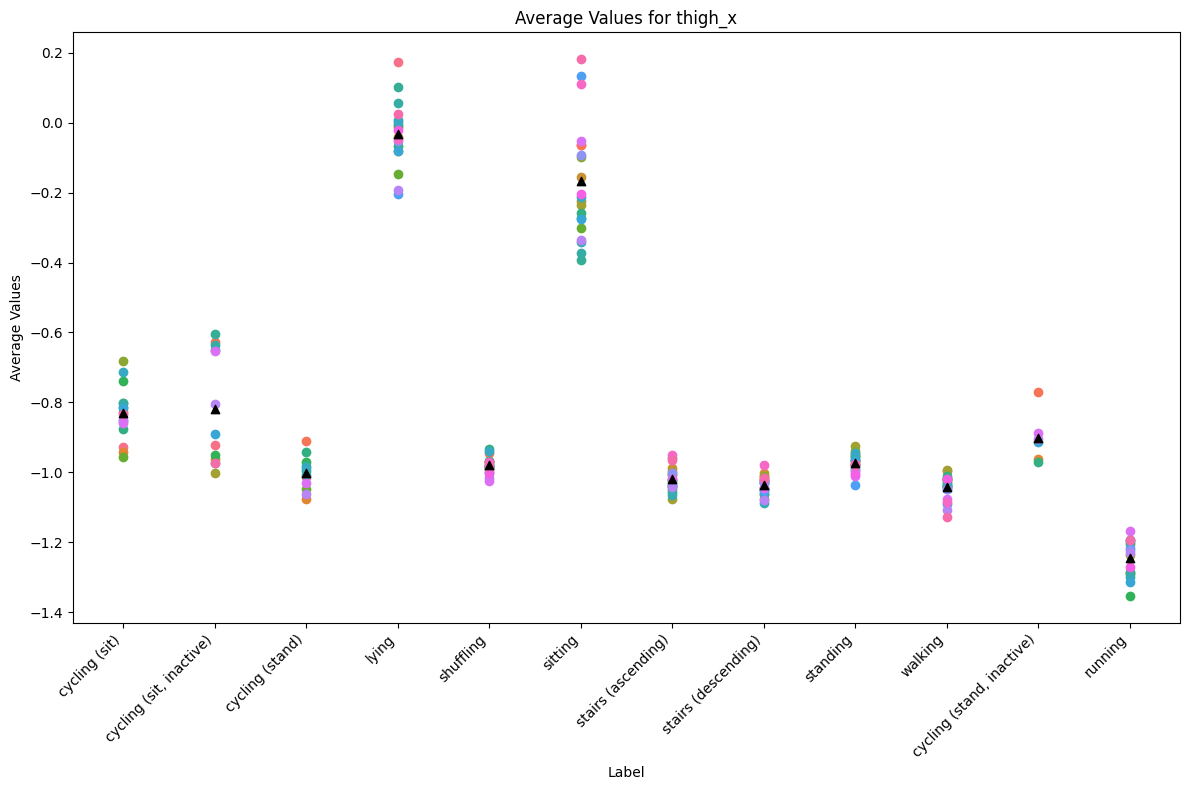

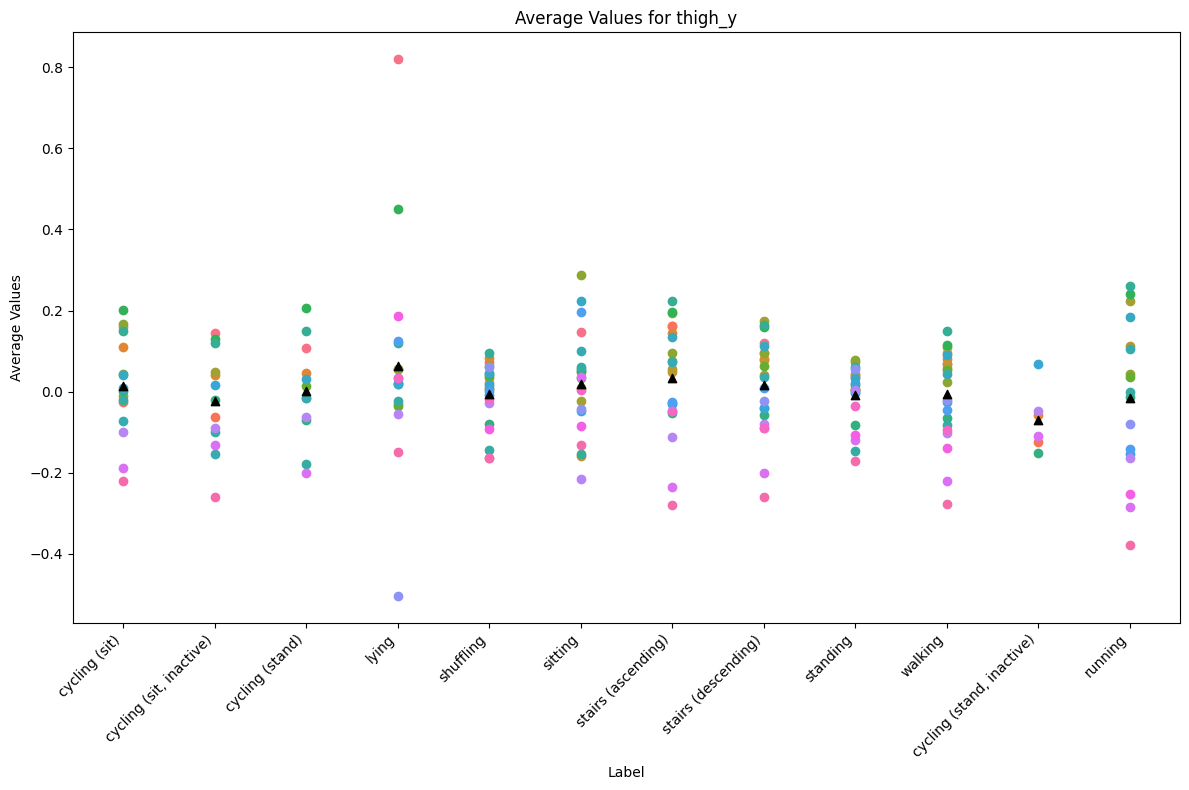

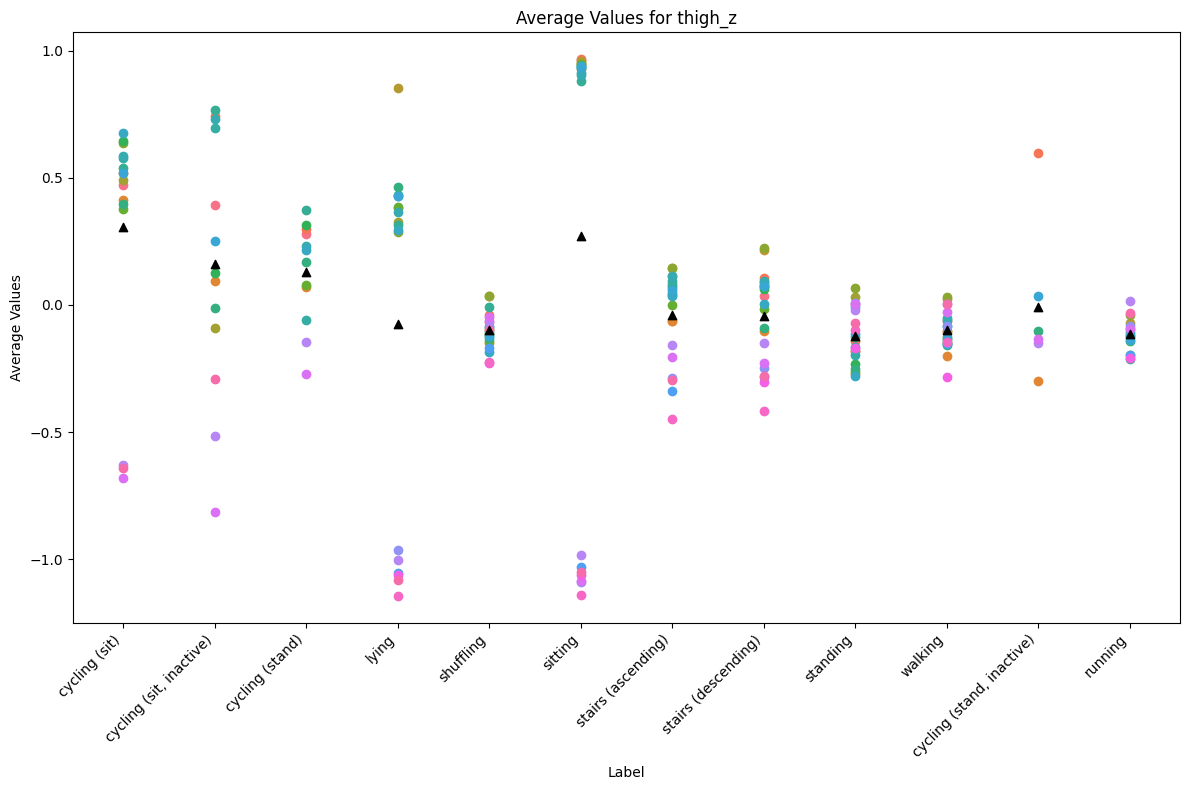

In [2]:
# Λήψη μιας λίστας με όλα τα αρχεία CSV σε έναν κατάλογο
csv_files = glob.glob('harth2/*.csv')

# Ορισμός του λεξικού ετικετών
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Ορισμός μιας χρωματικής παλέτας με αρκετά χρώματα για τον αριθμό των αρχείων CSV
colors = sns.color_palette('husl', len(csv_files))

# Επανάληψη για κάθε στήλη
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))
    
    # Ορισμός μιας λίστας για την αποθήκευση των μέσων όρων των τιμών, ομαδοποιημένων κατά ετικέτα
    grouped_means = {label: [] for label in labels.values()}

    # Επανάληψη για κάθε αρχείο CSV
    for idx, csv_file in enumerate(csv_files):
        # Ανάγνωση του αρχείου CSV
        df = pd.read_csv(csv_file)
        # Υπολογισμός του μέσου όρου αντί για τη διάμεσο
        mean_df = df.groupby('label')[column].mean()
        mean_df = mean_df.reset_index()  # Επαναφορά του δείκτη για πρόσβαση στη στήλη 'label'
        mean_df['label'] = mean_df['label'].map(labels)
        mean_df = mean_df.sort_values(by='label')  # Ταξινόμηση κατά ετικέτα

        # Προσθήκη των μέσων όρων στις λίστες για κάθε ετικέτα
        for label, mean in zip(mean_df['label'], mean_df[column]):
            grouped_means[label].append(mean)

        # Σχεδίαση των μέσων όρων για την τρέχουσα στήλη και αρχείο CSV
        plt.scatter(mean_df['label'], mean_df[column], color=colors[idx])
        
    # Υπολογισμός του μέσου όρου των μέσων όρων για κάθε ετικέτα
    mean_of_means = {label: pd.Series(mean).mean() for label, mean in grouped_means.items()}

    # Σχεδίαση του μέσου όρου των μέσων όρων για κάθε ετικέτα
    plt.scatter(mean_of_means.keys(), mean_of_means.values(), marker='^', color='black', label='Mean of Means')

    # Προσθήκη τίτλου, ετικετών και υπομνήματος
    plt.title(f"Average Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Average Values')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Medians 

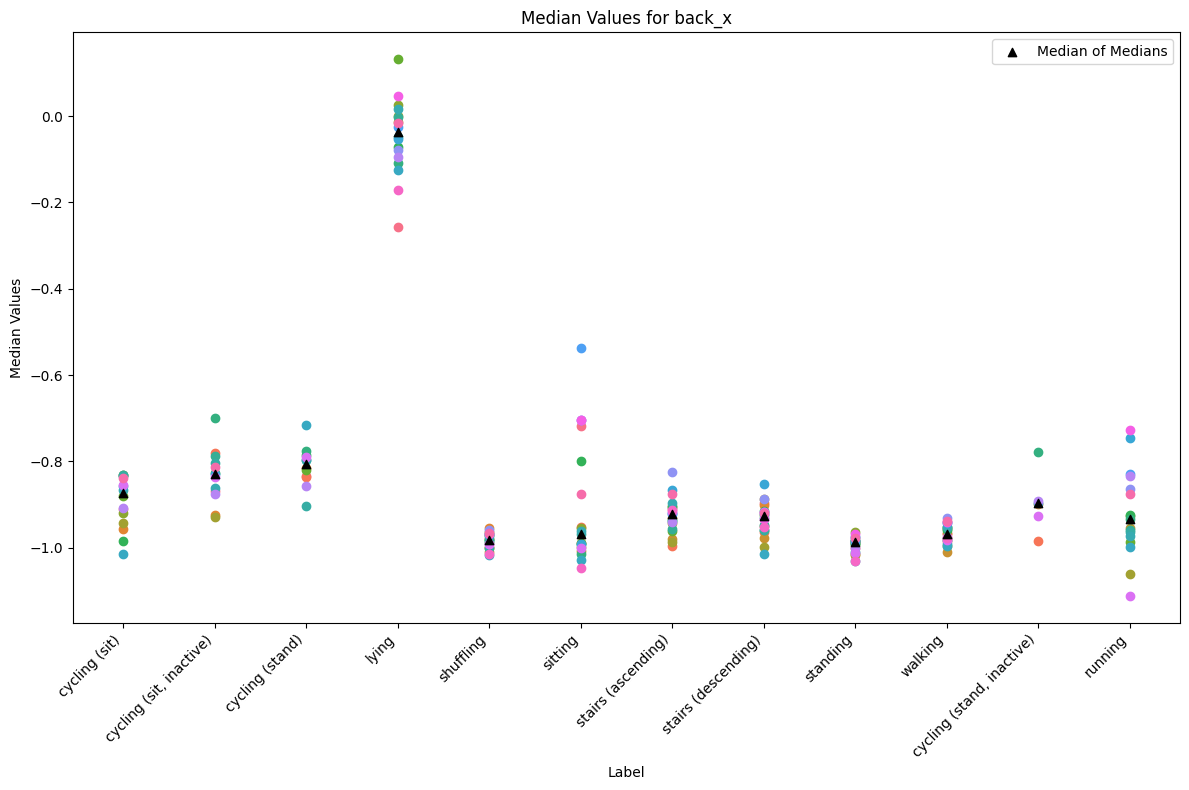

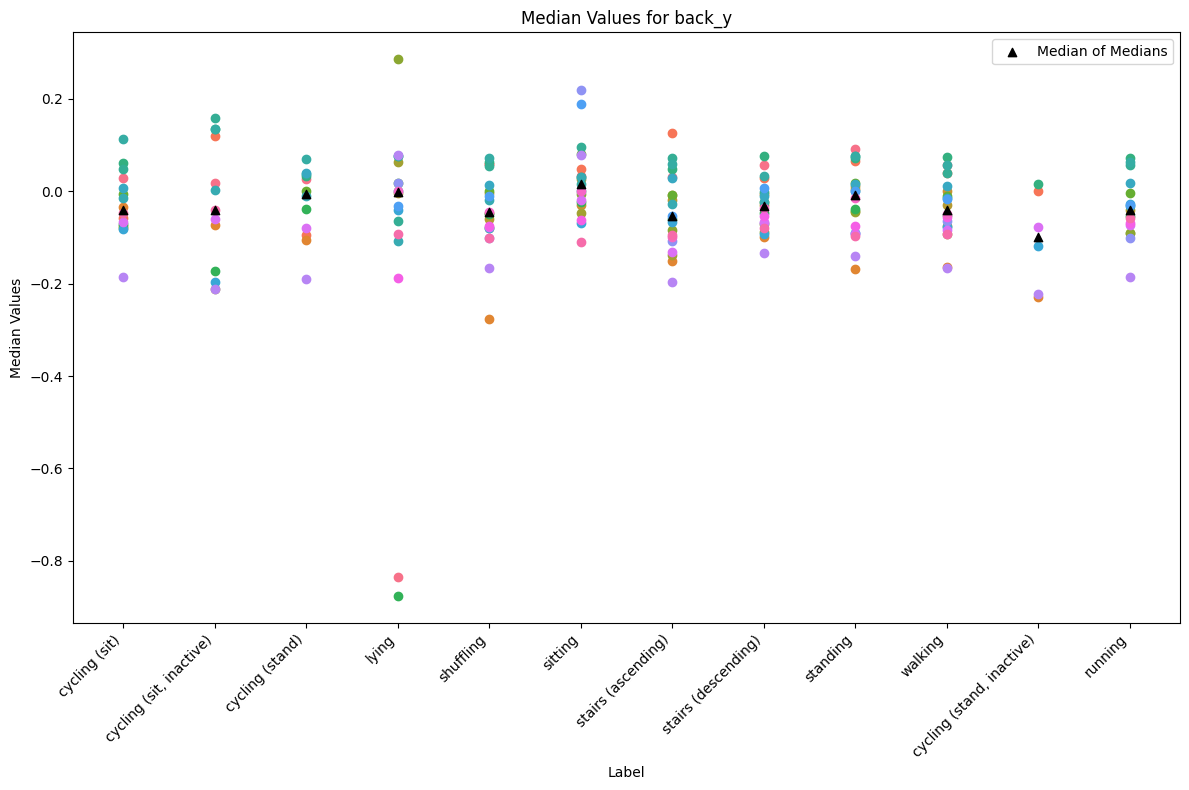

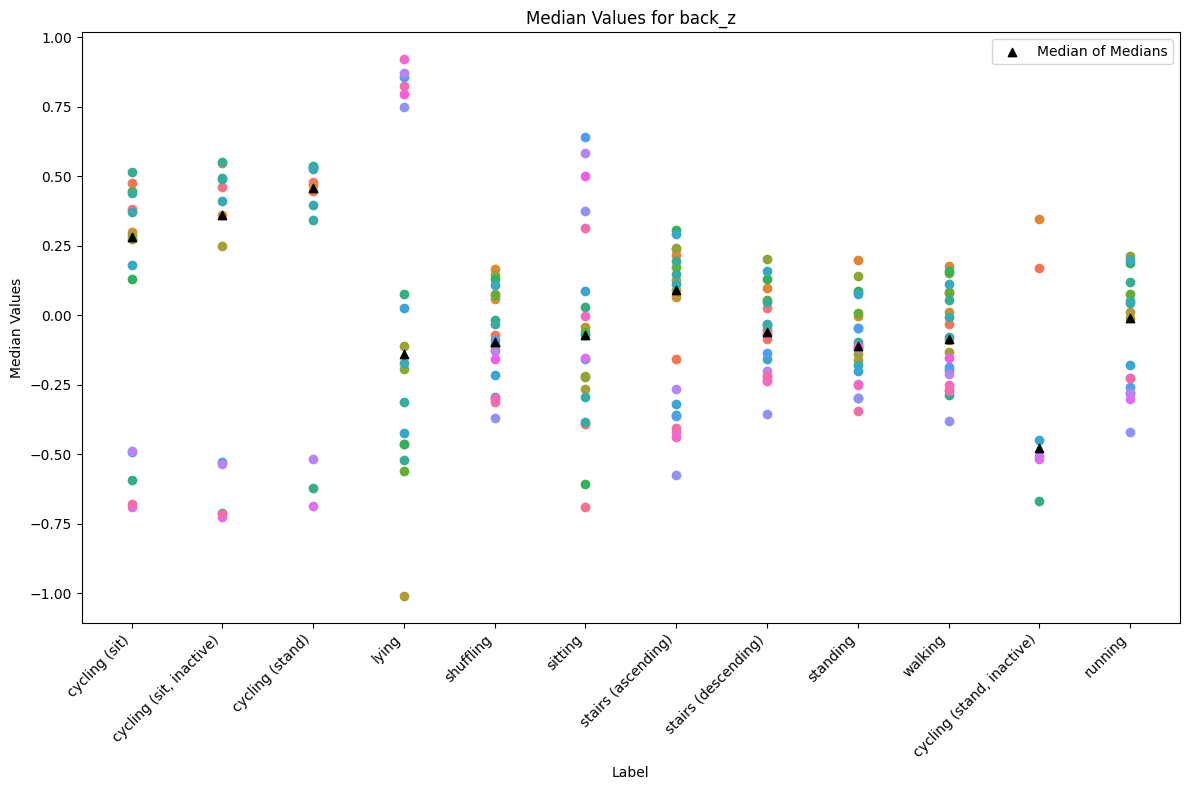

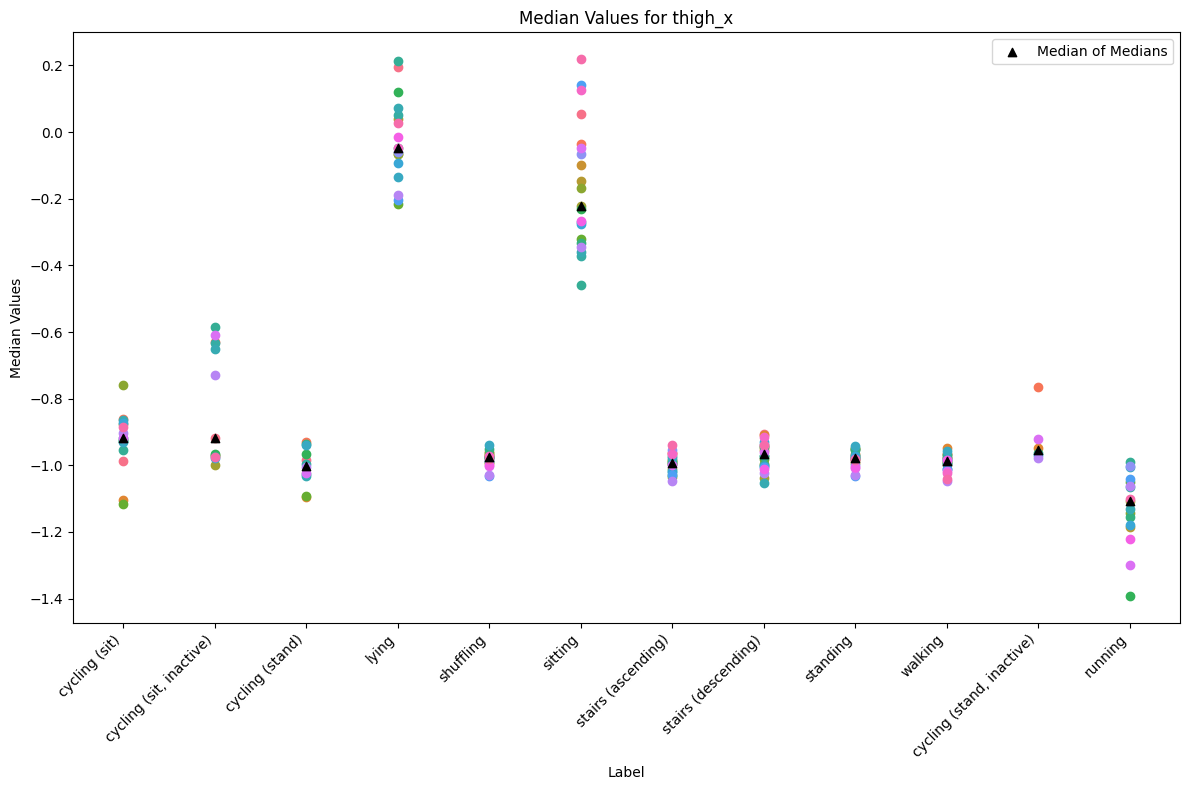

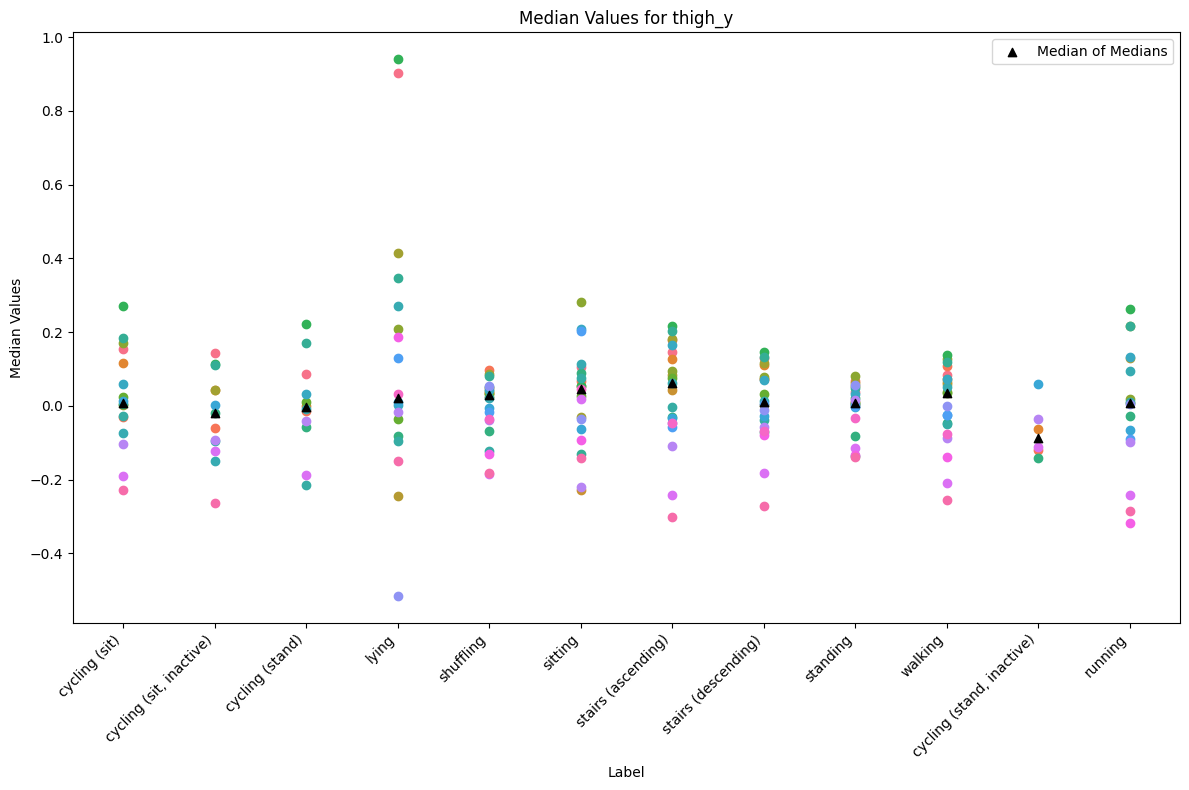

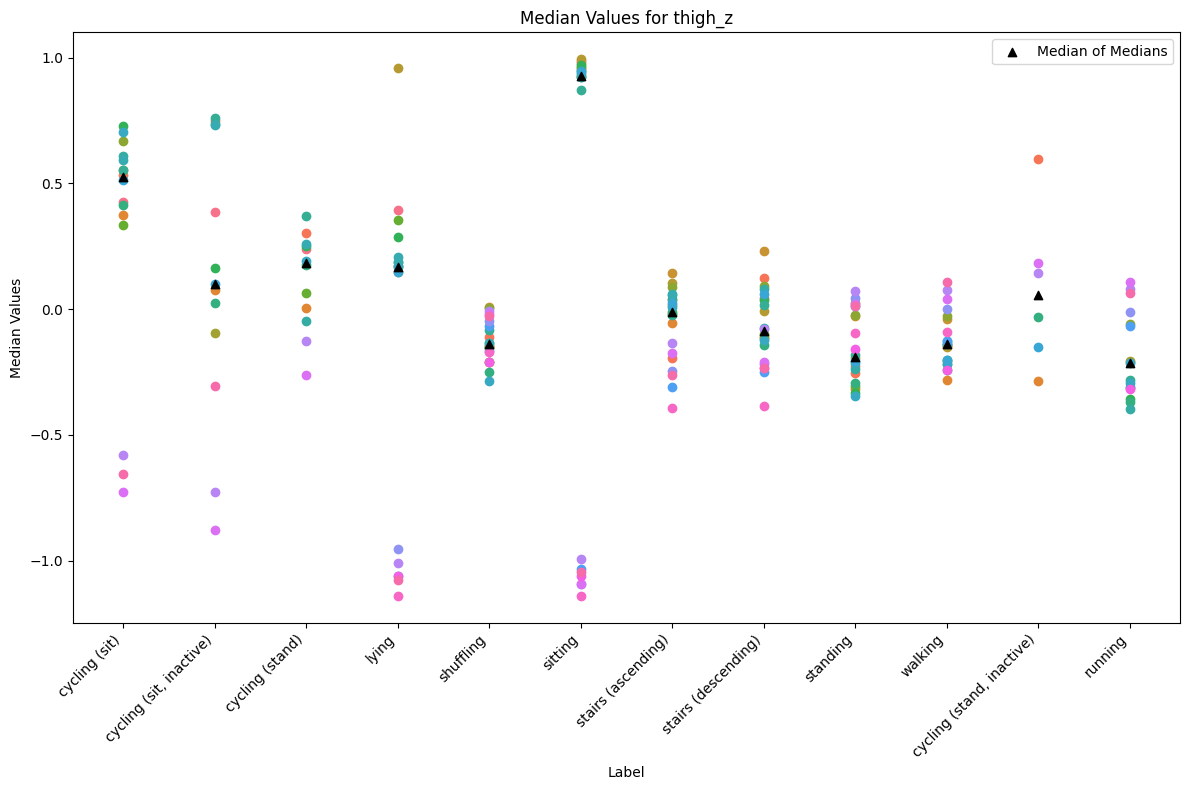

In [3]:
# αρχεία csv
csv_files = glob.glob('harth2/*.csv')

# Ορισμός του λεξικού με ετικέτες label
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# χρώματα για πλοτ
colors = sns.color_palette('husl', len(csv_files))


for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))

    # λίστα αποθήκευσης medians grouped by label
    grouped_medians = {label: [] for label in labels.values()}

    # για κάθε αρχείο
    for idx, csv_file in enumerate(csv_files):
        # csv σε df
        df = pd.read_csv(csv_file)

        # με βάση το 'label', υπολογισμός median για κάθε στήλη
        median_df = df.groupby('label')[column].median().reset_index()
        median_df['label'] = median_df['label'].map(labels)
        median_df = median_df.sort_values(by='label')  # Sorting by label

        # Append τις median values σε λίστα για κάθε label
        for label, median in zip(median_df['label'], median_df[column]):
            grouped_medians[label].append(median)

        # Plot median values για το κάθε χαρακτηριστικό μέτρησης
        plt.scatter(median_df['label'], median_df[column], color=colors[idx])

    # υπολογισμός του median των medians για κάθε label
    median_of_medians = {label: pd.Series(medians).median() for label, medians in grouped_medians.items()}

    # Plot τα median median των medians για κάθε label
    plt.scatter(median_of_medians.keys(), median_of_medians.values(), marker='^', color='black',
                label='Median of Medians')

    plt.title(f"Median Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Median Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Statistics

In [4]:
# Ορισμός του καταλόγου που περιέχει τα αρχεία CSV
directory = 'harth2'

# Λήψη λίστας όλων των αρχείων CSV στον κατάλογο
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Επανάληψη σε κάθε αρχείο CSV
for csv_file in csv_files:
    # Ανάγνωση του αρχείου CSV
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Αφαίρεση της στήλης 'label'
    values = df.drop(['label'], axis=1)
    
    # Υπολογισμός περιγραφικών στατιστικών και μεταφορά του αποτελέσματος
    statistics = values.describe().transpose()
    
    # Εμφάνιση του αποτελέσματος
    print(f"Descriptive statistics for {csv_file}:")
    print(statistics)
    print("\n")

Descriptive statistics for S006.csv:
            count      mean       std       min       25%       50%       75%  \
back_x   408709.0 -0.802201  0.238347 -3.542889 -0.983647 -0.937195 -0.654541   
back_y   408709.0 -0.000687  0.189062 -3.016498  0.001063  0.033240  0.074822   
back_z   408709.0 -0.274718  0.441805 -1.024363 -0.702338 -0.277446  0.064811   
thigh_x  408709.0 -0.370317  0.506666 -6.844045 -0.952840 -0.277711  0.068999   
thigh_y  408709.0  0.143471  0.213864 -5.757406  0.022534  0.086248  0.246292   
thigh_z  408709.0  0.617527  0.536430 -4.884791  0.144114  0.924066  1.001372   

              max  
back_x   0.952109  
back_y   2.569339  
back_z   1.628023  
thigh_x  3.898547  
thigh_y  4.602909  
thigh_z  5.391660  


Descriptive statistics for S008.csv:
            count      mean       std       min       25%       50%       75%  \
back_x   418989.0 -0.920351  0.130877 -3.066853 -0.998823 -0.972054 -0.826290   
back_y   418989.0  0.040018  0.107516 -1.209330 -0.013

# Frequency

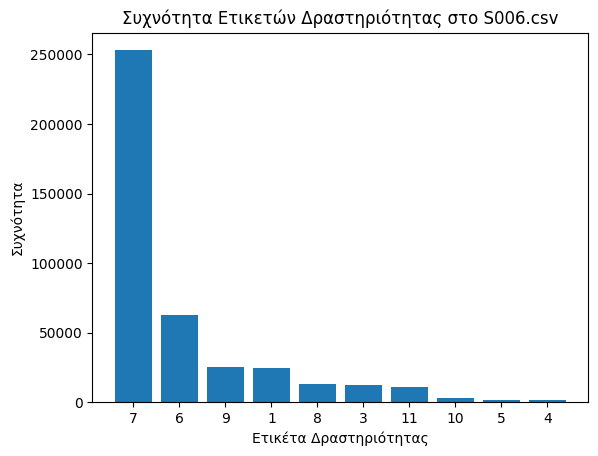

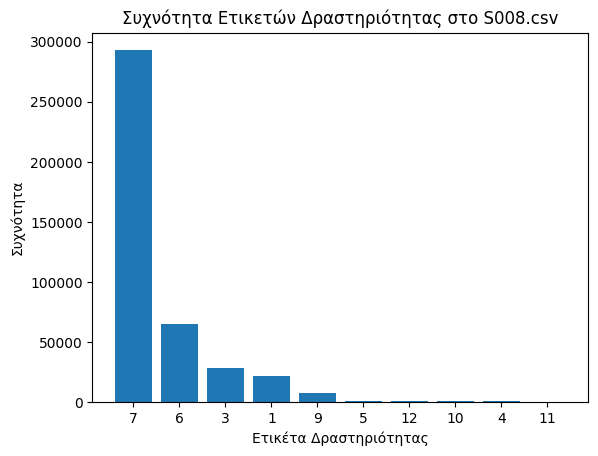

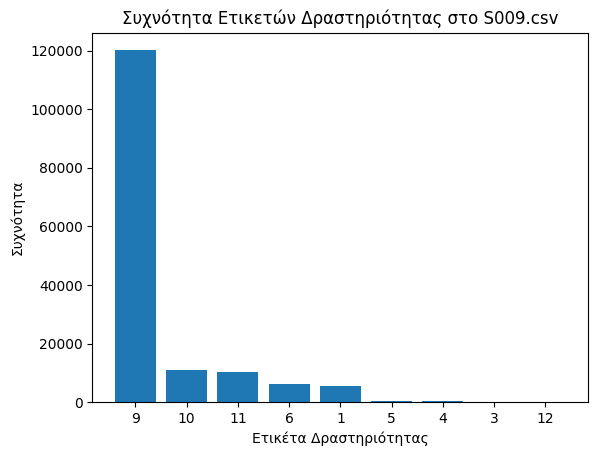

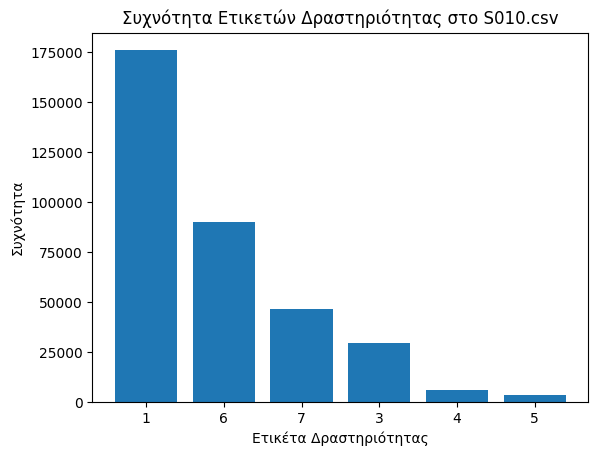

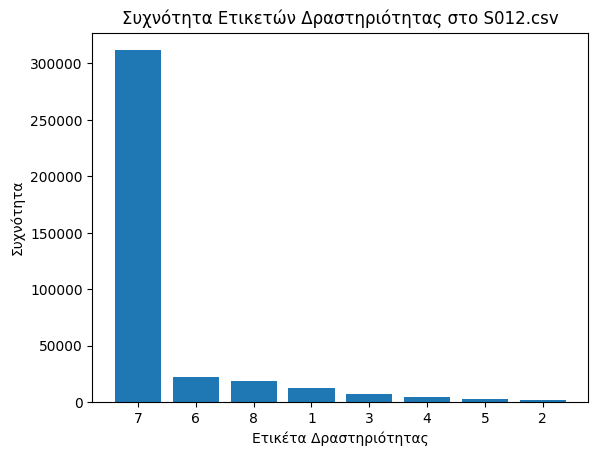

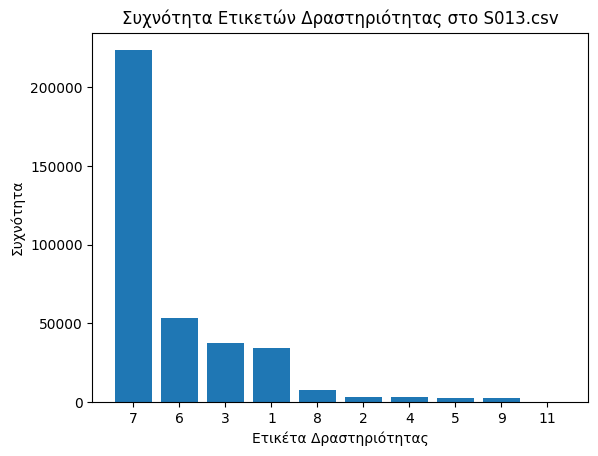

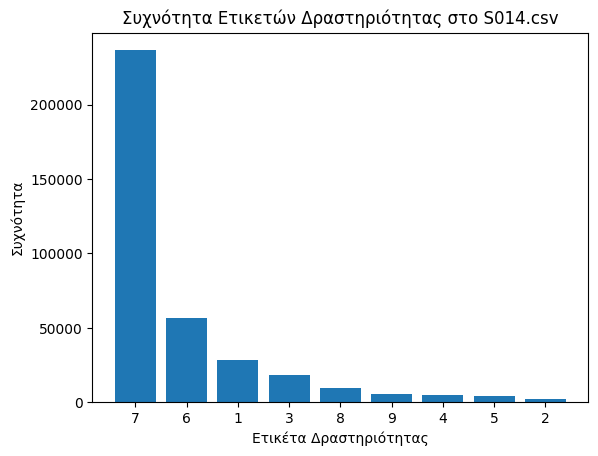

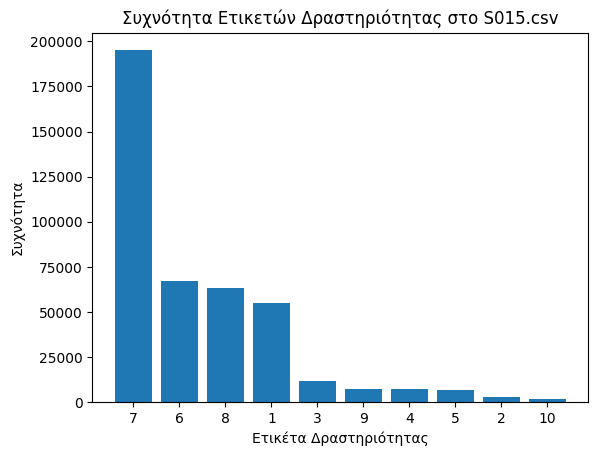

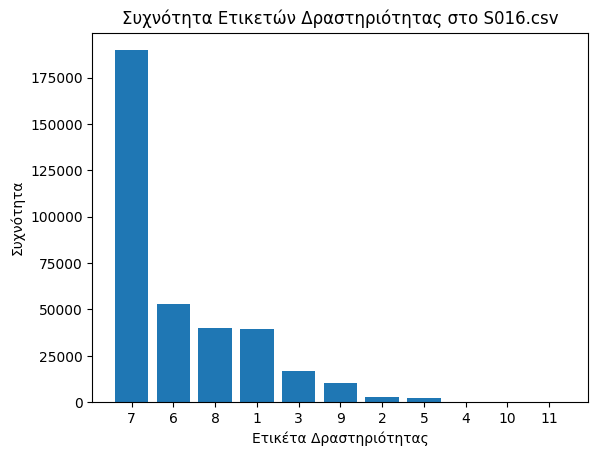

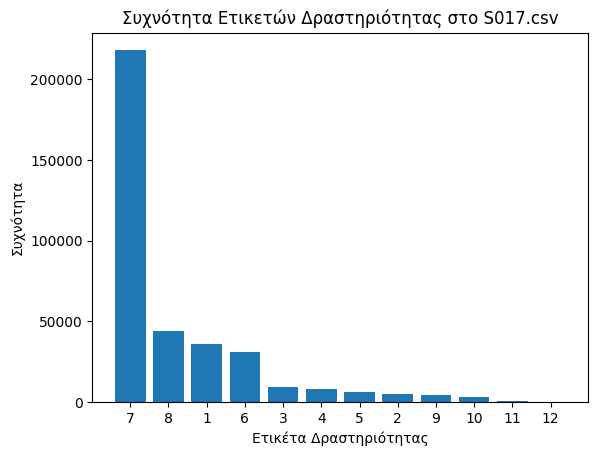

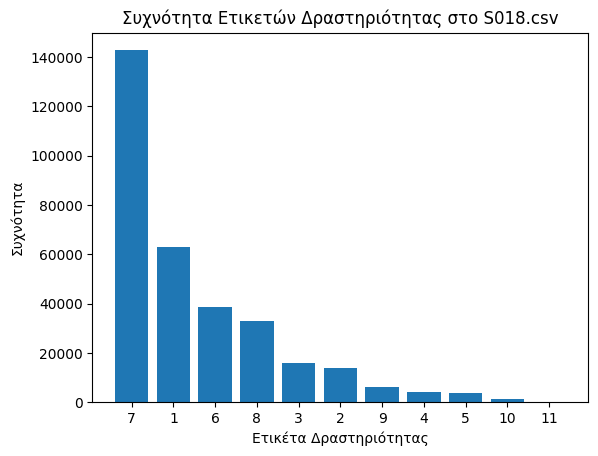

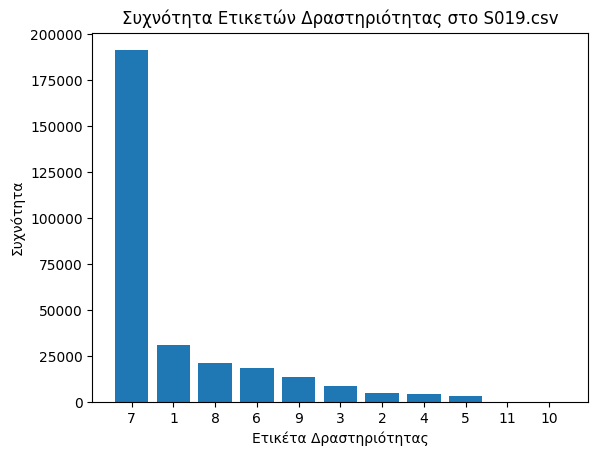

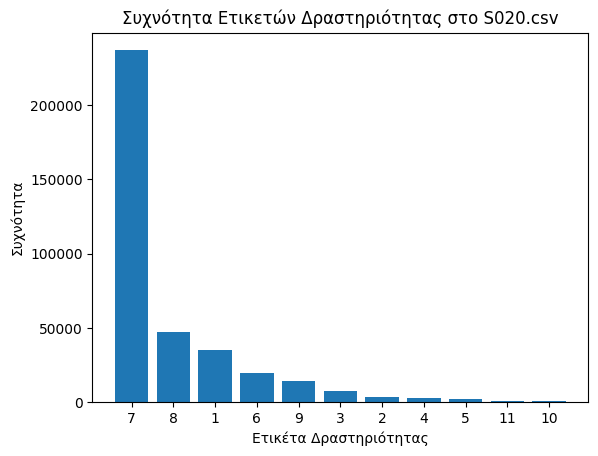

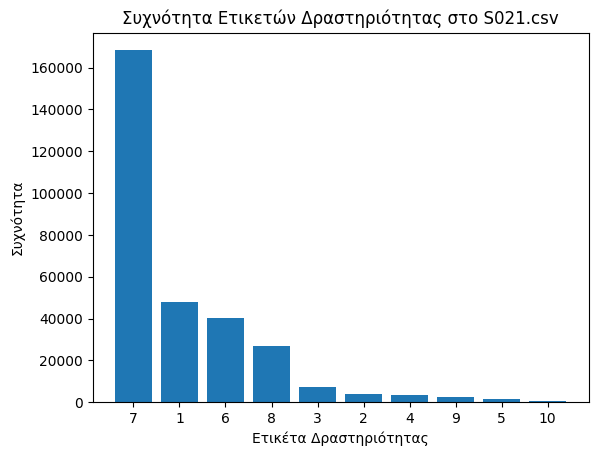

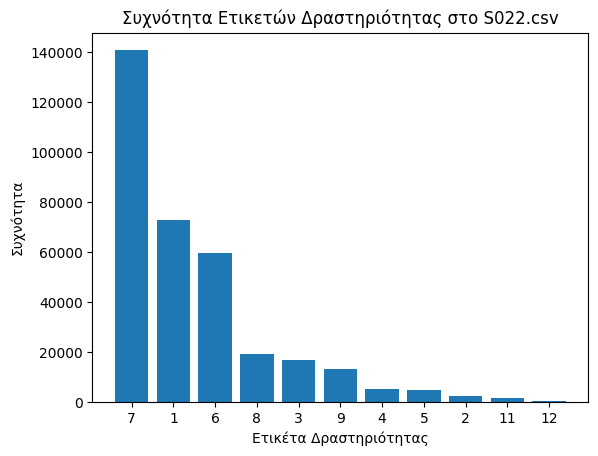

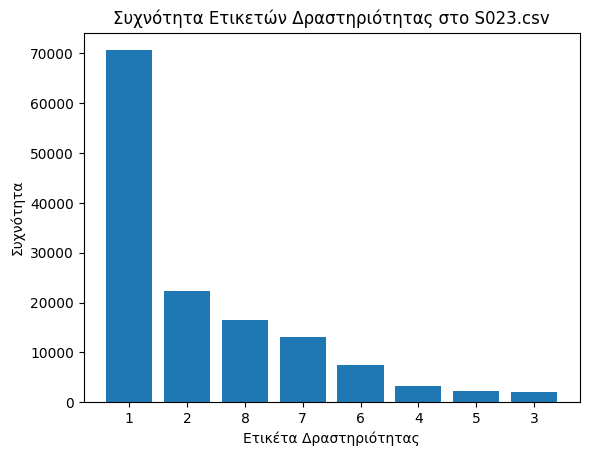

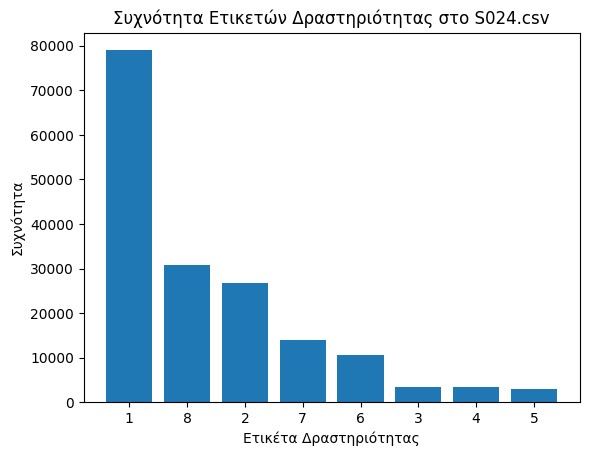

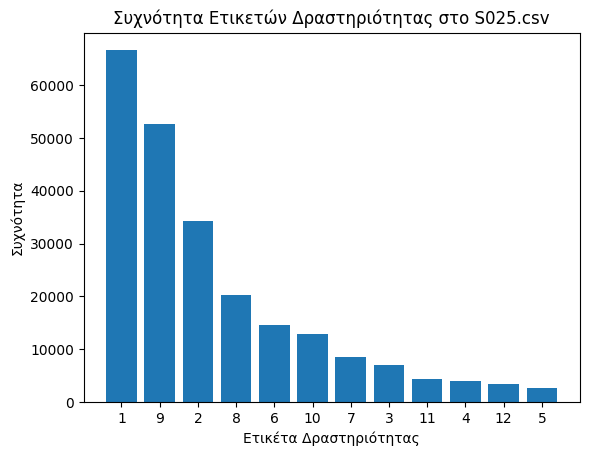

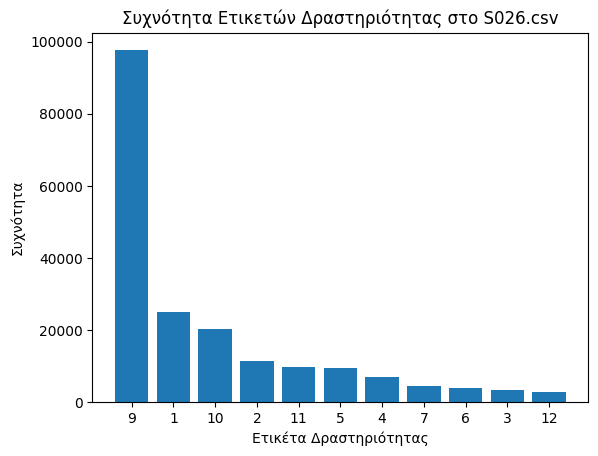

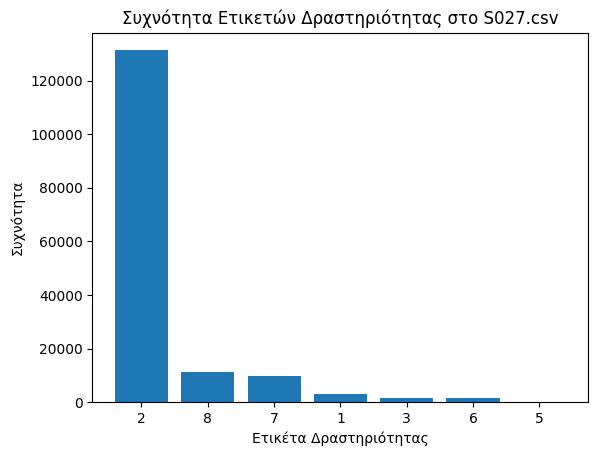

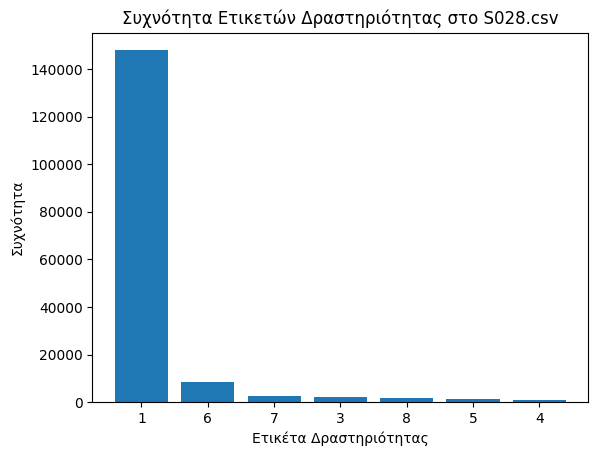

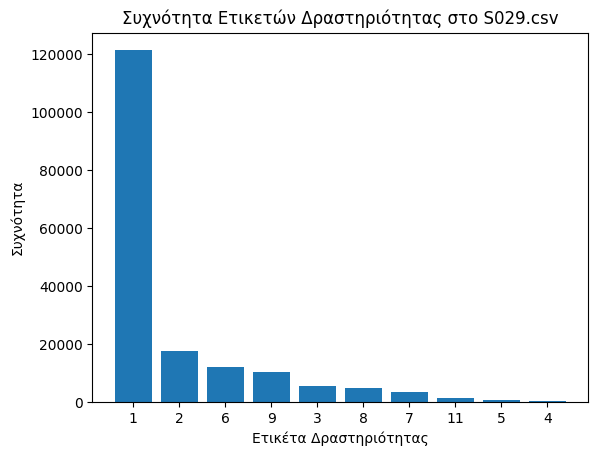

In [5]:
# Ορισμός του καταλόγου που περιέχει τα αρχεία CSV
directory = 'harth2'

# Ορισμός του λεξικού με τις ετικέτες
labels = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 13: 9, 14: 10, 130: 11, 140: 12}

# Λήψη λίστας όλων των αρχείων CSV στον κατάλογο
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Επανάληψη σε κάθε αρχείο CSV
for csv_file in csv_files:
    # Ανάγνωση του αρχείου CSV
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Αντικατάσταση των ετικετών με βάση το λεξικό
    df['label'] = df['label'].replace(labels)
    
    # Υπολογισμός της συχνότητας των ετικετών
    label_counts = df['label'].value_counts()
    
    # Δημιουργία γραφήματος για τη συχνότητα των ετικετών
    plt.bar(range(len(label_counts)), label_counts.values)
    plt.xlabel('Ετικέτα Δραστηριότητας')
    plt.ylabel('Συχνότητα')
    plt.title('Συχνότητα Ετικετών Δραστηριότητας στο ' + str(csv_file))
    plt.xticks(range(len(label_counts)), label_counts.index)
    plt.show()

# Range 

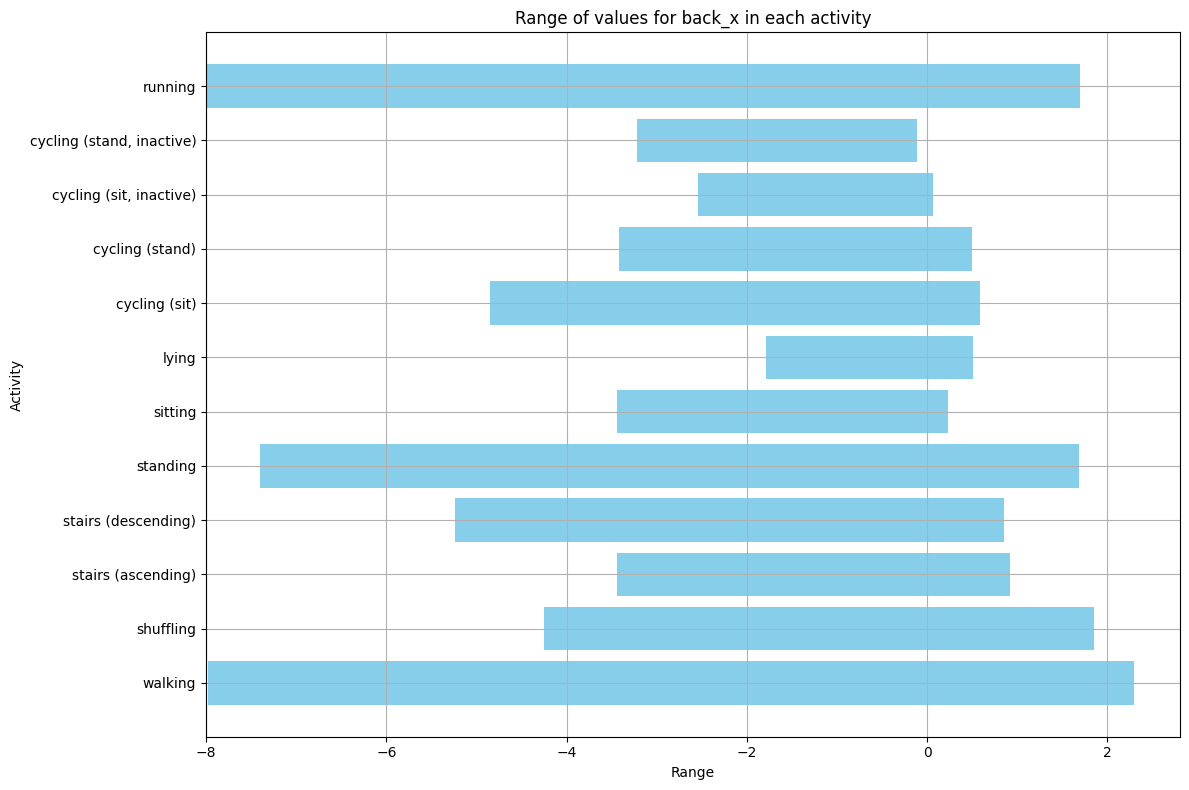

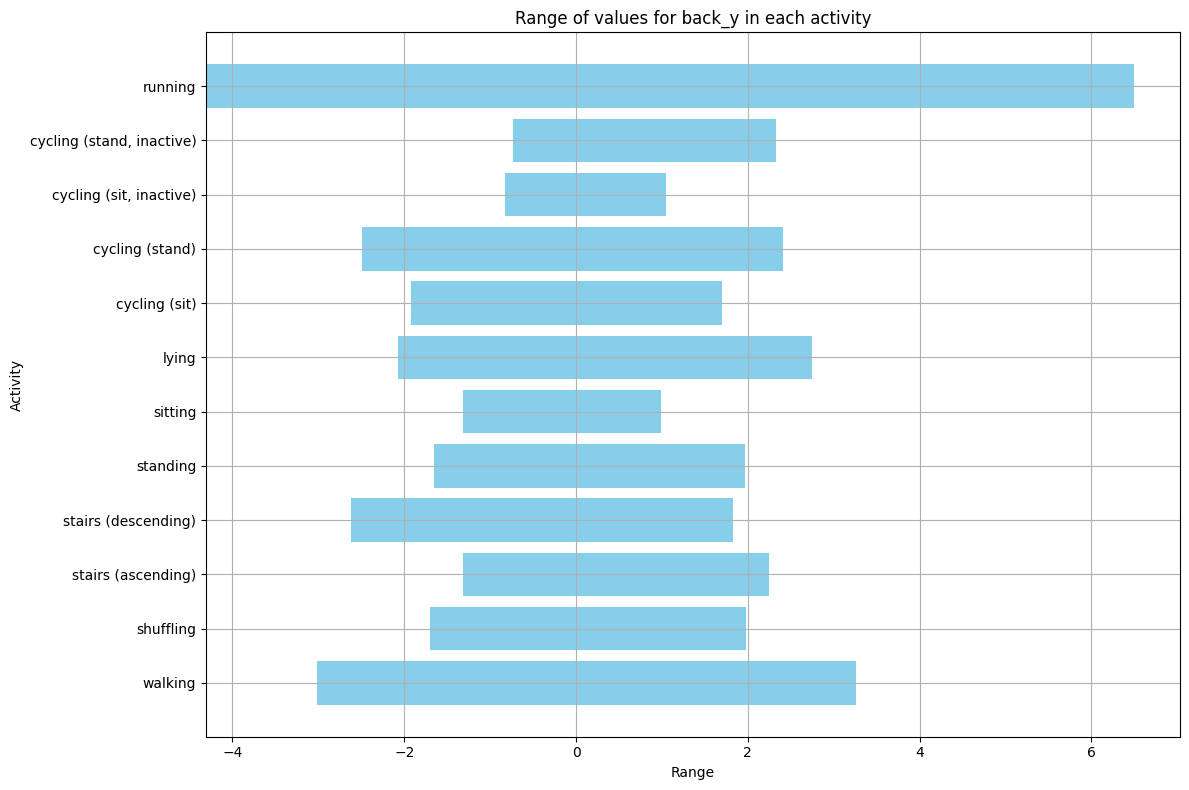

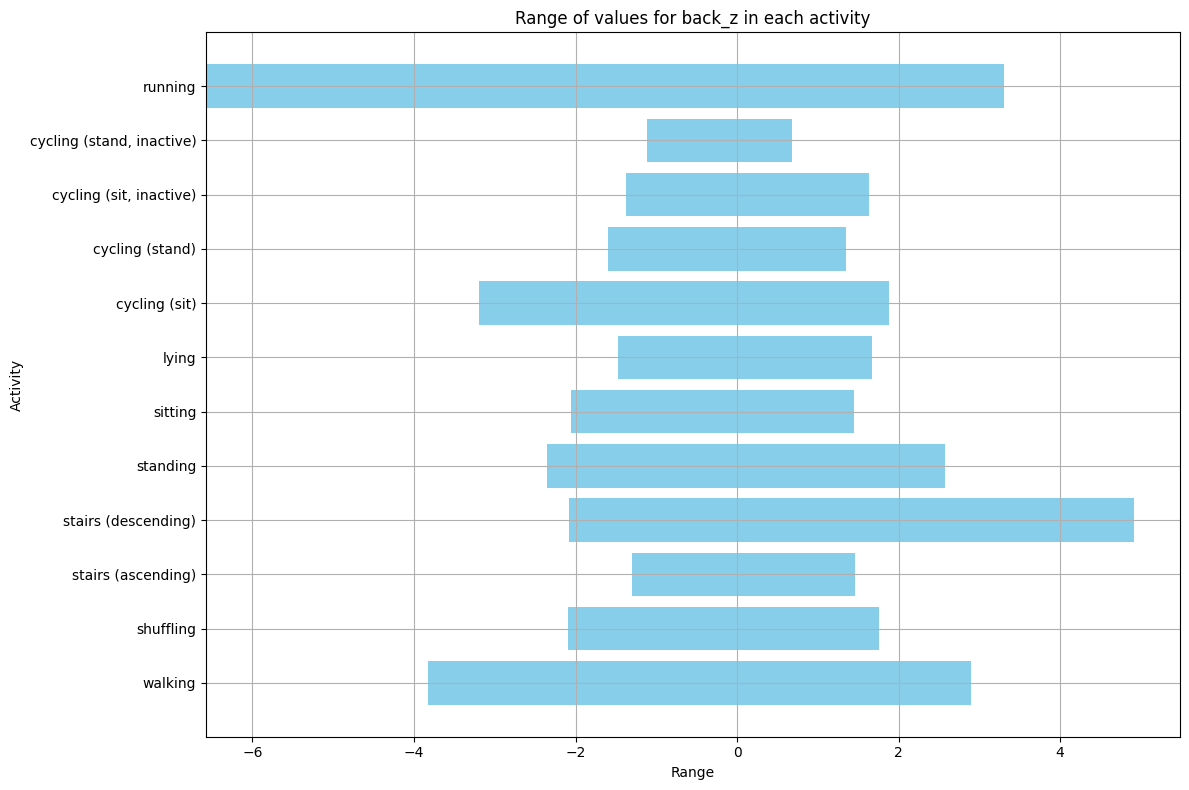

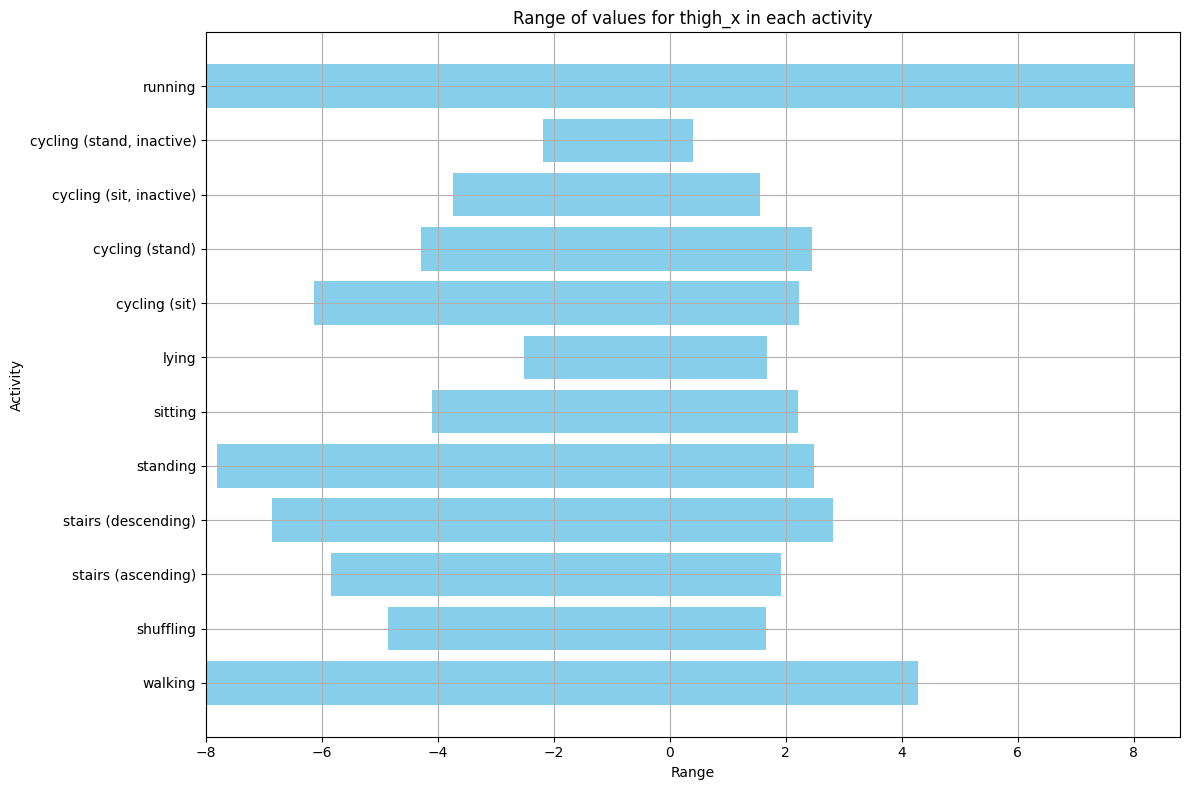

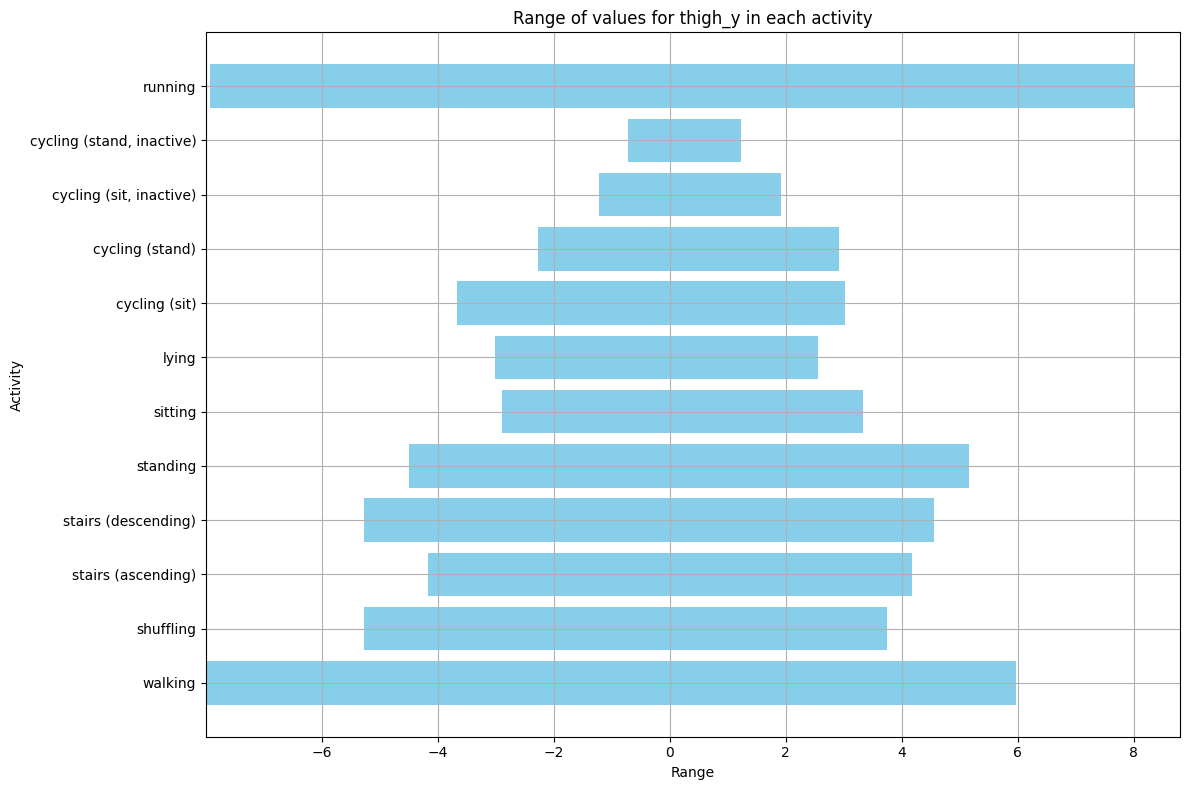

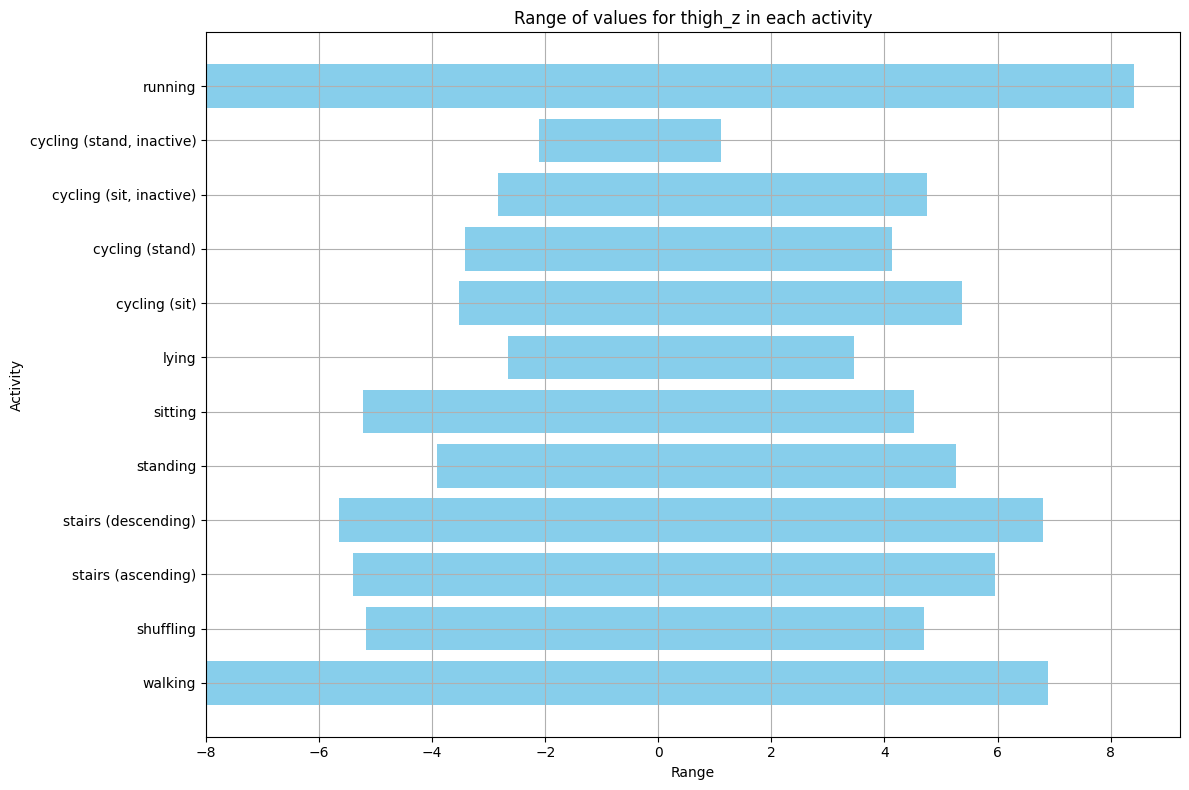

In [6]:
# αρχεία csv
csv_files = glob.glob('harth2/*.csv')

# Ορισμός του λεξικού με ετικέτες label
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Αρχικοποίηση λεξικών για την αποθήκευση ελάχιστων και μέγιστων τιμών για κάθε δραστηριότητα
min_values = {}
max_values = {}


for csv_file in csv_files:
    # csv σε df
    df = pd.read_csv(csv_file)

    # Ομαδοποίηση κατά ετικέτα και υπολογισμός του εύρους τιμών για κάθε δραστηριότητα 
    range_df = df.groupby('label').agg({'back_x': ['min', 'max'],
                                        'back_y': ['min', 'max'],
                                        'back_z': ['min', 'max'],
                                        'thigh_x': ['min', 'max'],
                                        'thigh_y': ['min', 'max'],
                                        'thigh_z': ['min', 'max']})

    # Ενημέρωση των λεξικών με τις νέες ελάχιστες και μέγιστες τιμές
    for label in range_df.index:
        activity_name = labels[label]  # αντιστοίχηση αριθμητικής ετικέτας σε όνομα δραστηριότητας
        if activity_name not in min_values:
            min_values[activity_name] = {}
            max_values[activity_name] = {}
        for column in range_df.columns.levels[0]:
            if column not in min_values[activity_name]:
                min_values[activity_name][column] = range_df.loc[label, (column, 'min')]
                max_values[activity_name][column] = range_df.loc[label, (column, 'max')]
            else:
                min_values[activity_name][column] = min(min_values[activity_name][column], range_df.loc[label, (column, 'min')])
                max_values[activity_name][column] = max(max_values[activity_name][column], range_df.loc[label, (column, 'max')])

# plot εύρους τιμών για κάθε τιμή αισθητήρα σε κάθε δραστηριότητα
for sensor_value in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    fig, ax = plt.subplots(figsize=(12, 8))

    y_labels = list(min_values.keys())
    y_ticks = np.arange(len(y_labels))

    for label_idx, label in enumerate(y_labels):
        min_val = min_values[label][sensor_value]
        max_val = max_values[label][sensor_value]
        ax.barh(label_idx, max_val - min_val, left=min_val, color='skyblue')

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Range')
    ax.set_ylabel('Activity')
    ax.set_title(f'Range of values for {sensor_value} in each activity')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Time series analysis 

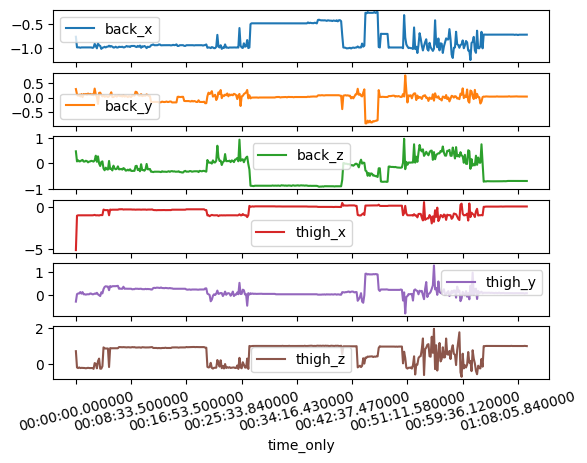

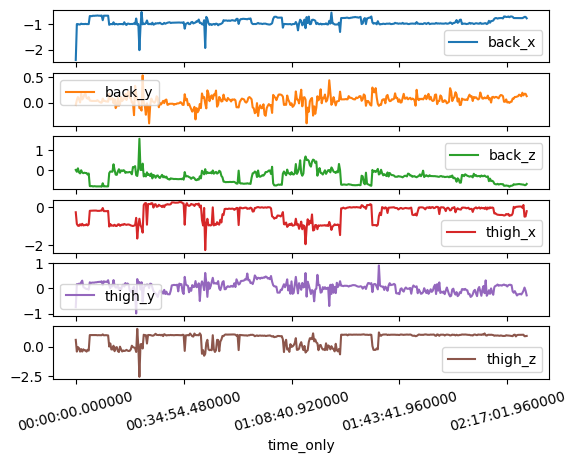

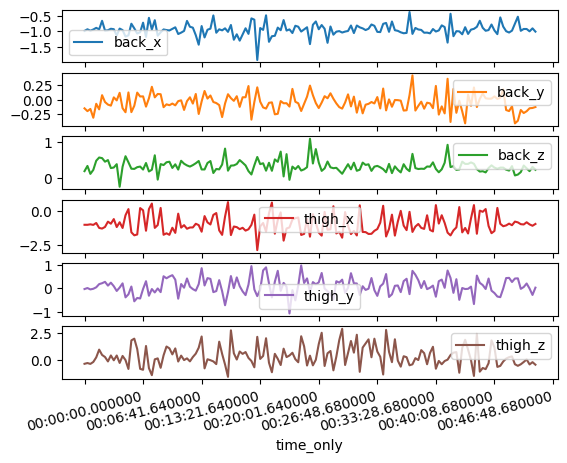

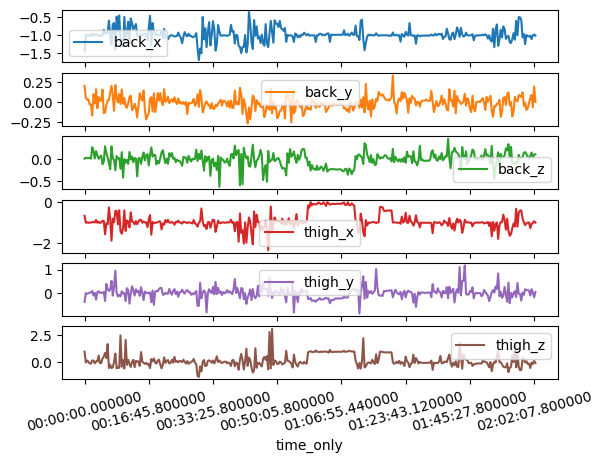

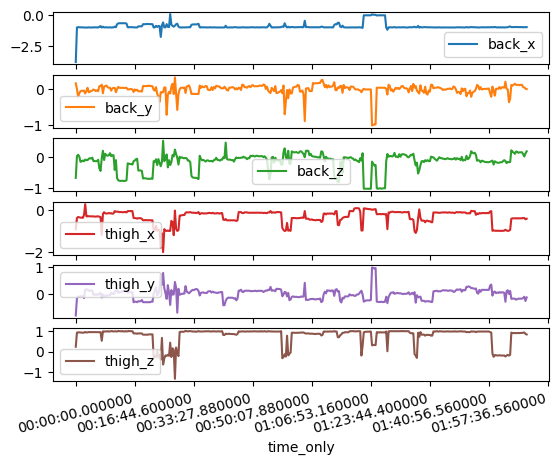

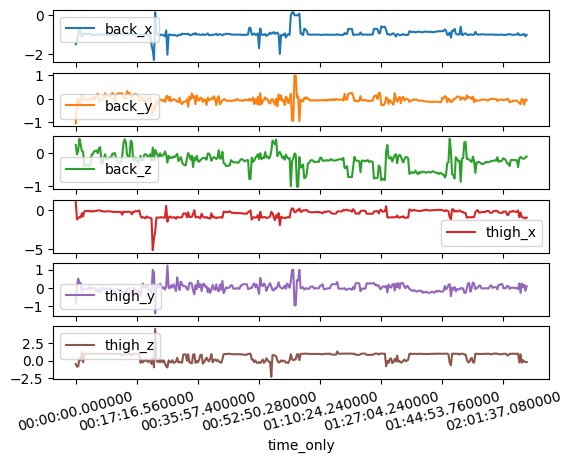

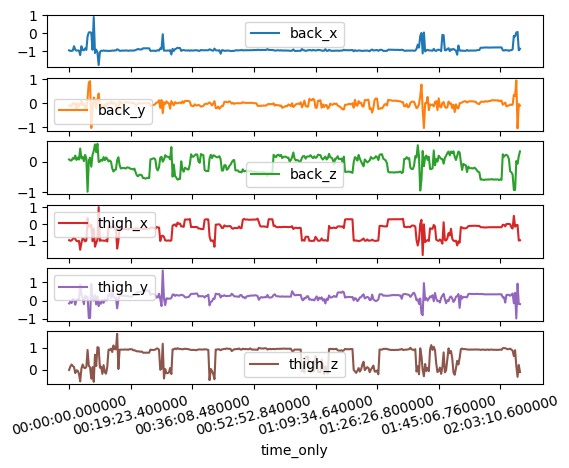

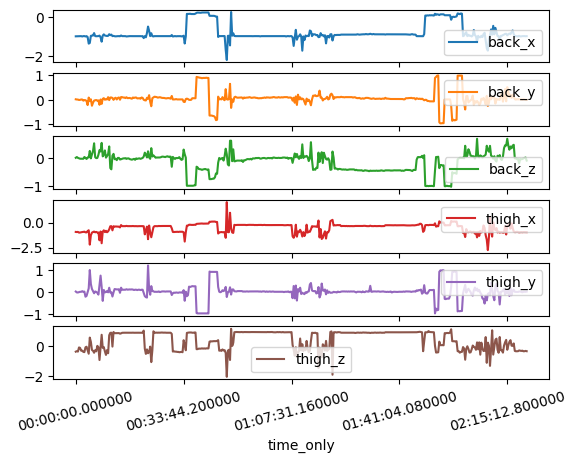

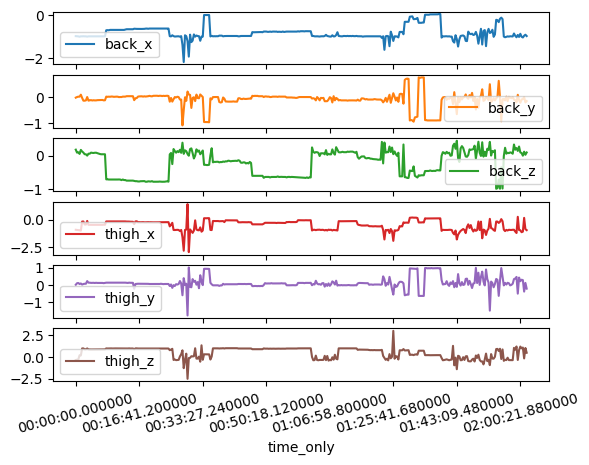

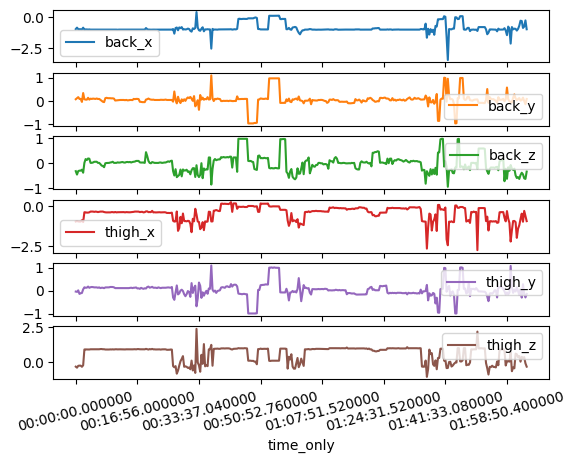

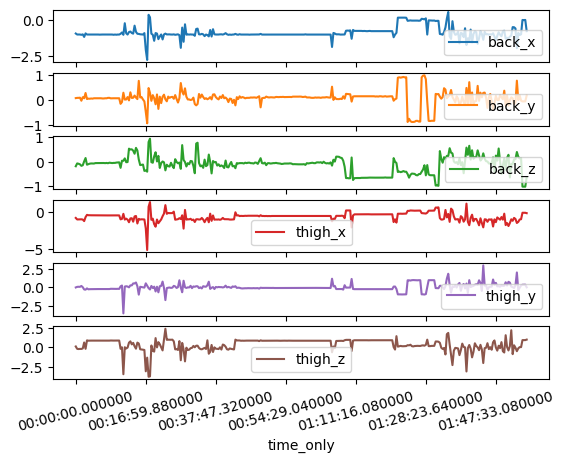

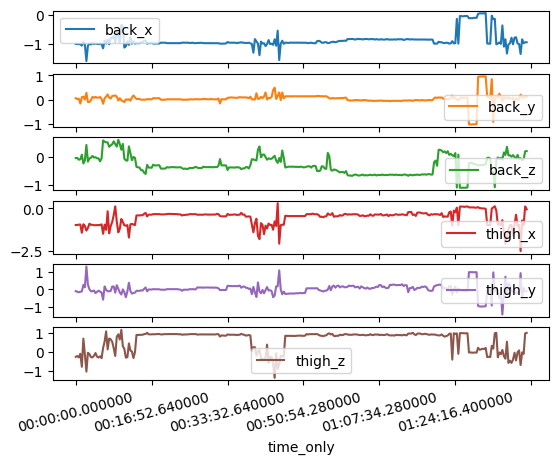

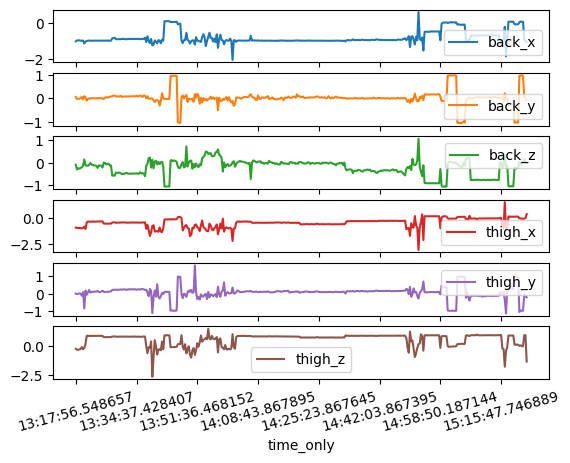

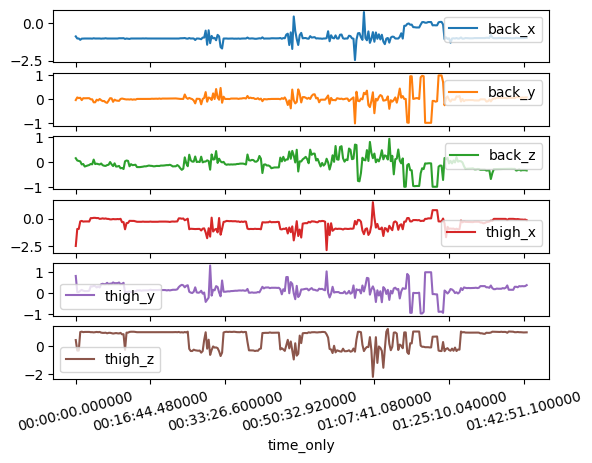

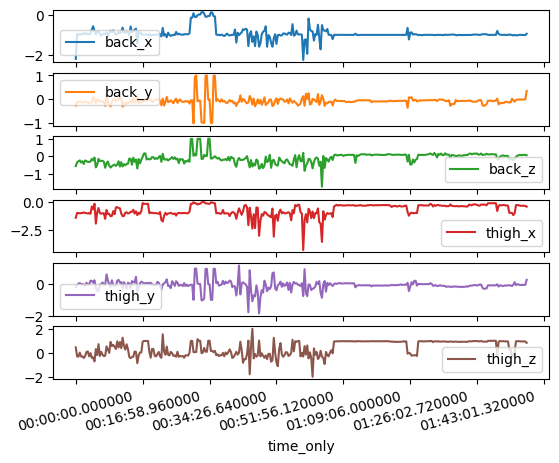

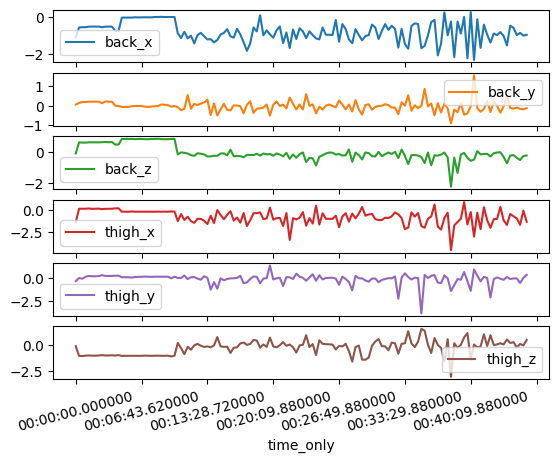

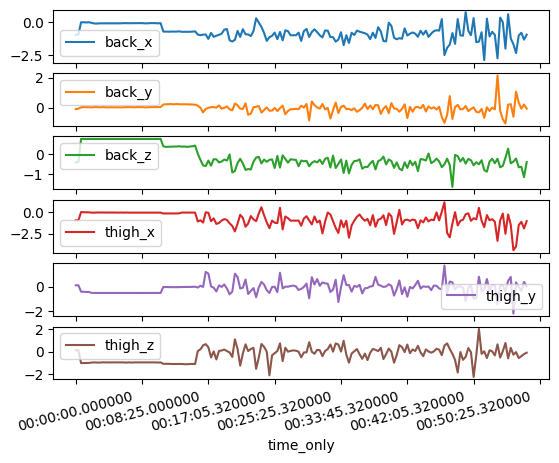

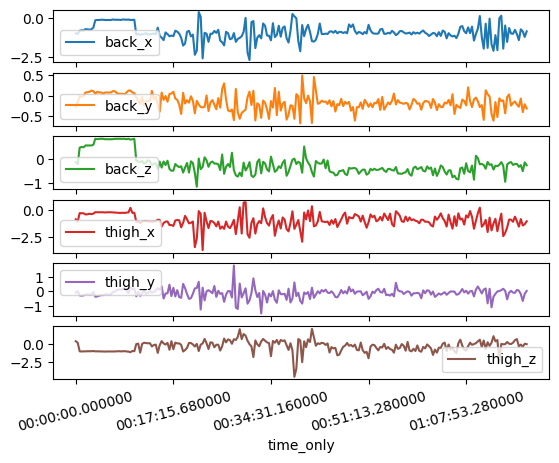

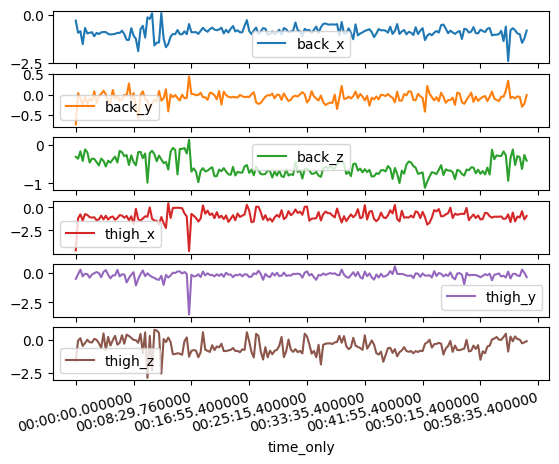

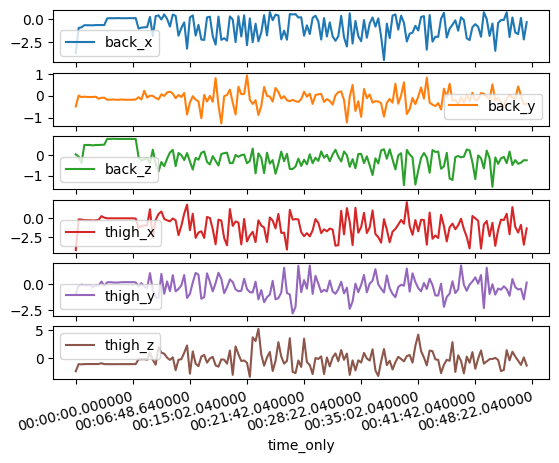

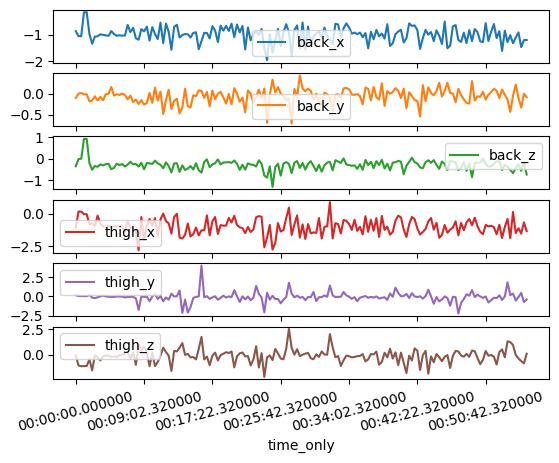

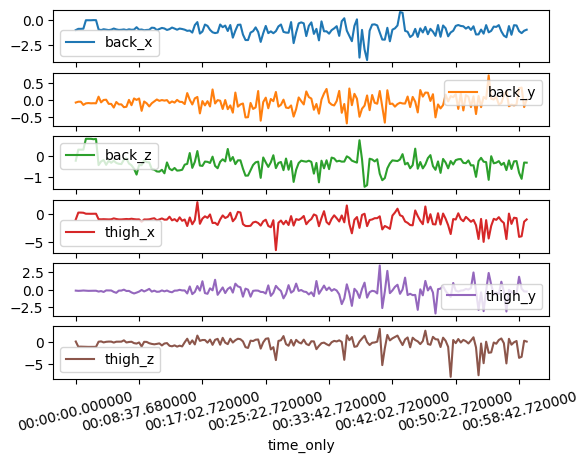

In [7]:
# Ορισμός του καταλόγου που περιέχει τα αρχεία CSV
directory = 'harth2'

# Λήψη λίστας όλων των αρχείων CSV στον κατάλογο
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Επανάληψη σε κάθε αρχείο CSV
for csv_file in csv_files:
    # Ανάγνωση του αρχείου CSV
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    # Δειγματοληψία δεδομένων (κάθε 1000η γραμμή)
    df = df[0::1000]
    
    # Προετοιμασία δεδομένων για σχεδίαση
    plot_cols = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
    plot_features = df[plot_cols]
    
    # Ανάθεση της μορφοποιημένης χρονικής στήλης ως δείκτη
    plot_features.index = df['time_only']
    
    # Σχεδίαση των δεδομένων
    plot_features.plot(subplots=True)
    
    # Προσαρμογή της γωνίας των ετικετών στον άξονα x
    plt.xticks(rotation=15)
    
    # Εμφάνιση του γραφήματος για το τρέχον αρχείο CSV
    plt.show()